In [ ]:
# experimental: you can run this cell to see your code full-width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python Programming - Pair Assignment - Week 6


# Your Week 6 assignment task is the same as in week 3 but for a different dataset

**Dataset: Guardian API**

Imagine you are a junior data analyst working for an organisation who has some use for this data. Your job is to identify and present some insights from the data - to ask, and then answer a question relevant to this business (aka. 'a business question'). Look at the data - what type of questions can they answer? 

1. Explore the data using code
2. Formulate and answer a business question (using the data)
3. Describe what you found using 200 words and ONE graph.

The question does not need to be complicated. The analysis does not need to be complicated - simple descriptives and visualisations are good enough! Your task is to use python to operate on data, find answer and support it with a graph or well-crafted table.

Differences from previous assignments:

- you can use Pandas&Numpys if you'd like
- dataset is different
- please produce only one visualisation (if you know how, and you really want to, you can combine a few graphs into one graph, but make sure they tell one story)
- please do not change the filename, because computer system then loses your files (3 pairs almost got zero points last time, before we realised)
- at the end of the notebook is the marking criteria

### Deliverable:

1. In this notebook please include all the code that you used to arrive at the conclusion. 
2. At the end of your notebook, you should also provide your 'mini-report':

- a markdown (text) cell with your mini-report (200 words +/- 10%). For reference, 'Marking criteria' section below has around 220 words)
- a cell which will generate the graph or table that accompanies your mini-report (you are allowed to combine number of graphs, if they are combined into one unit and make sense, eg. combining 3 bar charts side by side, or overlapping a line chart with a bar chart).
- any visualisation library is allowed, but for your own learning, try to use a few different ones during the course.

### Marks:

You will get points in university marking system for each of the below categories. 

0- 50% : Unsafisfactory

50-60% : Good

60-70% : Very Good

70% +  : Excellent

**Definition of 'Excellent': Text, graph and code that you would be proud to share on your LinkedIn, for your future employers to see.**

Your grade will be the average of your points in all below categories. This assignment is worth 10% of your grade for this course. You and your partner will get the same grade. Only ONE of you should submit the assignment.

### Marking Criteria:

**A) Business Question and Answer:** Did you manage to find a question that can be answered with given data? As an analyst you will often have to dive into available data and identify how it ccan help the business, or solve a problem, withou first knowing what the problem is. Also can you formulate a clear answer to the question you created?

**B) Using the Data:** How well did you use the data to answer your question? Your answer should be supported by what you found in the data. Briefly describe why this was the correct data, and correct analysis to perform on it.

**C) Visualisation:** Can you aid your argument/aswer with visual clues? Graph can say a thousand words, but it is also easy to make one which is confusing, or misleading. Use simple (or highly customised) graphs to make your argument clearer.

**D) Code Quality:** Is your code clean, readable and DRY (Don't repeat yourself)? Are you using good readable variable names? Did you clean up your code and does it not include enay old/unused parts?

**E) Code Structure:** Is your code well structured and broken down? Just like good writing has sentences, paragraphs and chapters, good code should be split into sections. Breakdown your code into cells and functions. Use meaningful signposts (eg. comments, function names) to guide the reader through your code.


### Difficulty:

This assignment should not take you and your partner more than 1-2h. There are not extra points for making the question DIFFICULT, but you are graded for CLEAN CODE and COMMUNICATING clearly.

# Task: 

### For ginen datasets try to identify one interesting question that data could answer. Then write python code that finds answer to that question, and describe your findings in a visualisation and a few sentences. 


**1. look at the data.**

are they in formats that you might need? (numbers, strings, dates, etc). Remember that you can change variables with data (eg. add new key-value pairs)

**2. what are the questions this data could answer?**

you are given an example questions, but if you want to pursue different questions, feel free to do that!

**3. write code to extract some meaningful information from this data**

make your code as meaningful as possible. make sure your variables and functions are meaningful.

**4. visualise what you found.**

this could be a simple graph, or a printed sentence or table

**5. write a very short, two-sentence synopsis of what you found**

What question you asked? What is the answer? What could it mean?

# FAQ:

⚠️ You can use the dataset given to you. Only add additional datasets if they someohow compliement the ones you were given (eg. to position things on a map)

⚠️ In your notebook you will explore the data and play around a bit. But you will be marked on the quality of all of your code, so make sure you clean up things you ended up not using.

⚠️ Often during exploration people produce very many graphs, and that's ok. This graphs will NOT be marked. At the end PICK ONE GRAPH which accompanies your written mini-report best, and make sure it is included in a clear way with yoru writeup. If it will be unclear which graph is your picked one, we will mark a last one we see and ignore everything else.

⚠️ Your writeup has a very strict word limit. It is ok to write text and comments amongst your code, but they will not count towards your writeup mark, or your writeup wordcount.

⚠️ Easiest way to do well on this assignment is: 

- use meaningul variable/function names. 
- structure your code well in cells and functions
- write a mini-report where things are backed by the analysis you ran with your code (i.e. are not just personal opinions, or known facts).

Good luck!

# Your submission goes below:

### Business Question:
We are looking at the comparsion of rightwing query between India and US news articles in the UK Guardian database. In order to find the most common topics in that query, we have split up the tokens into five categories: policy, violence, COVID-19, religions and politics. 

### Set Up

In [1]:
# Import libraries + additional imports
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import requests
import seaborn as sns
import string
from nltk.tokenize import word_tokenize            
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Set up API credentials and base URL
MY_API_KEY = "2cb7b689-ec13-4275-8a99-a4207c053643"
API_ENDPOINT = 'http://content.guardianapis.com/search'

### Define Query

In [3]:
# Define search query - included three different instances the way right-wing can be found
query = ("right-wing,right wing,rightwing")

In [4]:
# Define the parameters for the API call
my_params = {
    'from-date': '2020-01-01',
    'order-by': 'oldest',       
    'show-fields': 'all',      
    'query-fields': 'body',     
    'q': query,                 
    'page-size': 200,           
    'api-key': MY_API_KEY       
}

In [5]:
# Collect search results in data frame
current_page = 1           
total_pages = float('inf') 
df_all = pd.DataFrame()   

while current_page <= total_pages:                     
    print("... extracting results from page", current_page)                    
    try:                                              
        my_params['page'] = current_page               
        r = requests.get(API_ENDPOINT, my_params)       
        data = r.json()                                
        news_items = data['response']['results']          
        df_page = pd.json_normalize(news_items)           
        df_all = pd.concat([df_all, df_page], ignore_index=True) 
    except Exception as e:                             
        print(f"Error: {e}")                            
        break                                            
    total_pages = data['response']['pages']            
    current_page += 1                                   

... extracting results from page 1
... extracting results from page 2
... extracting results from page 3
... extracting results from page 4
... extracting results from page 5
... extracting results from page 6
... extracting results from page 7
... extracting results from page 8
... extracting results from page 9
... extracting results from page 10
... extracting results from page 11
... extracting results from page 12
... extracting results from page 13
... extracting results from page 14
... extracting results from page 15
... extracting results from page 16
... extracting results from page 17
... extracting results from page 18
... extracting results from page 19
... extracting results from page 20
... extracting results from page 21
... extracting results from page 22
... extracting results from page 23
... extracting results from page 24
... extracting results from page 25
... extracting results from page 26
... extracting results from page 27
... extracting results from page 28
.

### USA
Find the frequency count of the tokens and group in categories in the US articles.

In [6]:
#Filter the DatFrame for the word 'US' or'USA' in webtitles

import re

web_title_us=[]

for i in range(len(df_all['webTitle'])):
    if re.search(r'\bUS\b',df_all.loc[i, 'webTitle']) or re.search(r'\bUSA\b',df_all.loc[i, 'webTitle']):
        web_title_us.append(df_all.loc[i, 'webTitle'])
        
df_US = df_all[df_all['webTitle'].isin(web_title_us)]
df_US.shape

(576, 46)

In [7]:
#After parsing through the dataset, we defined the section names to be removed
us_sections_to_remove = ["Australia news", "Football","Fashion","Guardian Sustainable Business","Stage","Sport","Travel","UK news"]

# Filter the DataFrame to remove rows with the specified section names
df_US = df_US.loc[~df_US['sectionName'].isin(us_sections_to_remove)]
df_US.shape

(546, 46)

In [8]:
# Collecting all the articles from the data frame and tokenise the text
                         
articles=df_US['fields.bodyText'].tolist()          
s = " ".join(articles)                             
us_tokens = word_tokenize(s)                          
lower_us_tokens = [word.lower() for word in us_tokens]
print(len(lower_us_tokens))                          
print(lower_us_tokens[0:5000])  

1373691
['a', 'group', 'of', 'us', 'environmental', 'activists', 'engaged', 'in', 'non-violent', 'civil', 'disobedience', 'targeting', 'the', 'oil', 'industry', 'have', 'been', 'listed', 'in', 'internal', 'department', 'of', 'homeland', 'security', 'documents', 'as', '“', 'extremists', '”', 'and', 'some', 'of', 'its', 'members', 'listed', 'alongside', 'white', 'nationalists', 'and', 'mass', 'killers', ',', 'documents', 'obtained', 'by', 'the', 'guardian', 'reveal', '.', 'the', 'group', 'have', 'been', 'dubbed', 'the', 'valve', 'turners', ',', 'after', 'closing', 'the', 'valves', 'on', 'pipelines', 'in', 'four', 'states', 'carrying', 'crude', 'oil', 'from', 'canada', '’', 's', 'tar', 'sands', 'on', '11', 'october', '2016', 'which', 'accounted', 'for', 'about', '15', '%', 'of', 'us', 'daily', 'consumption', '.', 'it', 'was', 'described', 'as', 'the', 'largest', 'coordinated', 'action', 'of', 'its', 'kind', 'and', 'for', 'a', 'few', 'hours', 'the', 'oil', 'stopped', 'flowing', '.', 'the',

In [9]:
# Remove some stopwords (incl. a long list of uninteresting words,
uninteresting_words=['.','’','‘','“','”','–',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
#Words we decided to remove after parsing through most frequent tokens.
additional_words=['--',"''",'``',"'s",'year','time',]

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + uninteresting_words + additional_words)

us_filtered_text = [token 
                 for token in lower_us_tokens 
                 if not token in remove_these]

In [10]:
#Use Lemmatisation to group different inflected forms of a word.
# Creating a list of stemmed words
us_lemmatised_words=[]
for w in us_filtered_text:
    us_lemmatised_words.append(lemmatizer.lemmatize(w))

In [11]:
#Count of all words in the articles after lemmatisation. 
us_total_word_count = len(us_lemmatised_words)
print(us_total_word_count)

564627


In [20]:
# Initialize dictionaries for each category
us_violence = dict.fromkeys(['violence', 'shooting', 'killing', 'attack','murder','gun'], 0)
us_religion = dict.fromkeys(['hindu', 'muslim', 'islam', 'christianity', 'religion', 'mosque','temple','christian'], 0)
us_policy = dict.fromkeys(['lgbtq+', 'military', 'woman', 'abortion', 'black', 'race','school'], 0)
us_covid = dict.fromkeys(['covid', 'coronavirus', 'pandemic', 'health', 'covid-19', 'quarantine', 'infection'], 0)
us_politics = dict.fromkeys([ 'bjp', 'congress', 'rightwing', 'leftwing', 'party','biden', 'trump', 'obama', 'president', 'leader', 'minister', 'modi', 'gandhi'], 0)

#Our data
us_tokens = us_lemmatised_words

# Function to update the count for each category
def update_frequency(token, categories):
    for category in categories:
        if token in category:
            category[token] += 1

#Iterate over each word in the list and update frequencies
for token in us_tokens:
    update_frequency(token, [us_violence, us_religion, us_policy, us_covid, us_politics])

# Define the category names and their corresponding dictionaries
us_category_dicts = {
    'violence': us_violence,
    'religion': us_religion,
    'policy': us_policy,
    'covid': us_covid,
    'politics': us_politics
}

# Calculate percentage
us_percentage_list = [
    {category_name: sum(us_category_dict.values()) / us_total_word_count*100}
    for category_name, us_category_dict in us_category_dicts.items()
]

print(us_percentage_list)

[{'violence': 0.44489547967064985}, {'religion': 0.060393852932998246}, {'policy': 0.7984031936127743}, {'covid': 0.9423920570571368}, {'politics': 2.767136534384647}]


### India
Find the frequency count of the tokens and group in categories in the India articles.

In [13]:
#Filter the DatFrame for the word 'India' in webtitles

import re

web_title_india=[]

for i in range(len(df_all['webTitle'])):
    if re.search(r'\bIndia\b',df_all.loc[i, 'webTitle']):
        web_title_india.append(df_all.loc[i, 'webTitle'])
        
df_india = df_all[df_all['webTitle'].isin(web_title_india)]
df_india.shape

(59, 46)

In [14]:
# Collecting all the articles from the data frame and tokenise the text                             
articles=df_india['fields.bodyText'].tolist()          
s = " ".join(articles)                             
india_tokens = word_tokenize(s)                          
lower_india_tokens = [word.lower() for word in india_tokens] 
print(len(lower_india_tokens))                           
print(lower_india_tokens[0:5000])       

166244
['students', 'have', 'protested', 'in', 'cities', 'across', 'india', 'after', 'a', 'masked', 'mob', 'stormed', 'a', 'high-profile', 'university', 'in', 'delhi', 'and', 'attacked', 'students', 'and', 'teachers', 'with', 'weapons', 'including', 'sledgehammers', ',', 'iron', 'rods', 'and', 'bricks', ',', 'injuring', 'more', 'than', '30', '.', 'opposition', 'parties', 'and', 'injured', 'students', 'blamed', 'sunday', 'night', '’', 's', 'violence', 'on', 'a', 'student', 'organisation', 'linked', 'to', 'the', 'prime', 'minister', 'narendra', 'modi', '’', 's', 'hindu', 'nationalist', 'bharatiya', 'janata', 'party', '(', 'bjp', ')', ',', 'which', 'has', 'increasingly', 'targeted', 'the', 'institution', '.', 'the', 'attack', 'at', 'the', 'jawaharlal', 'nehru', 'university', '(', 'jnu', ')', ',', 'long', 'seen', 'as', 'a', 'bastion', 'of', 'leftwing', 'politics', ',', 'comes', 'as', 'students', 'lead', 'a', 'nationwide', 'campaign', 'against', 'a', 'citizenship', 'law', 'introduced', 'las

In [15]:
# Remove some stopwords (incl. a long list of uninteresting words,
uninteresting_words=['``',"''","india", "told",'.','’','‘','“','”','.',"'s",'""','’','‘','"','""','–',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
#Words we decided to remove after parsing through most frequent tokens.
additional_words=['--',"''",'``',"'s",'year','time',]

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + uninteresting_words + additional_words)

india_filtered_text = [token 
                 for token in lower_india_tokens 
                 if not token in remove_these]

In [16]:
#Use Lemmatisation to group different inflected forms of a word.
# Creating a list of stemmed words
india_lemmatised_words=[]
for w in india_filtered_text:
    india_lemmatised_words.append(lemmatizer.lemmatize(w))

In [17]:
#Count of all words in the articles after lemmatisation.
india_total_word_count = len(india_lemmatised_words)
print(india_total_word_count)

68223


In [19]:
# Initialize dictionaries for each category
india_violence = dict.fromkeys(['violence', 'shooting', 'killing', 'attack','murder','gun'], 0)
india_religion = dict.fromkeys(['hindu', 'muslim', 'islam', 'christianity', 'religion', 'mosque'], 0)
india_policy = dict.fromkeys(['lgbtq+', 'military', 'woman', 'abortion', 'black', 'race','school'], 0)
india_covid = dict.fromkeys(['covid', 'coronavirus', 'pandemic', 'health', 'covid-19', 'quarantine', 'infection'], 0)
india_politics = dict.fromkeys([ 'bjp', 'congress', 'rightwing', 'leftwing', 'party','biden', 'trump', 'obama', 'president', 'leader', 'minister', 'modi', 'gandhi'], 0)

#Our data
india_tokens = india_lemmatised_words

# Function to update the count for each category
def update_frequency(token, categories):
    for category in categories:
        if token in category:
            category[token] += 1

#Iterate over each word in the list and update frequencies
for token in india_tokens:
    update_frequency(token, [india_violence, india_religion, india_policy, india_covid, india_politics])

# Define the category names and their corresponding dictionaries
india_category_dicts = {
    'violence': india_violence,
    'religion': india_religion,
    'policy': india_policy,
    'covid': india_covid,
    'politics': india_politics
}

# Calculate percentage
india_percentage_list = [
    {category_name: sum(india_category_dict.values()) / india_total_word_count*100}
    for category_name, india_category_dict in india_category_dicts.items()
]

print(india_percentage_list)

[{'violence': 0.266772202922768}, {'religion': 1.0055259956319718}, {'policy': 0.31367720563446344}, {'covid': 2.446389047681867}, {'politics': 1.8058426044002756}]


### Your minireport can be here

Click this cell to edit it. Run it with Shift+Enter to see how it will look when 'interpreted'.

### Visualisation

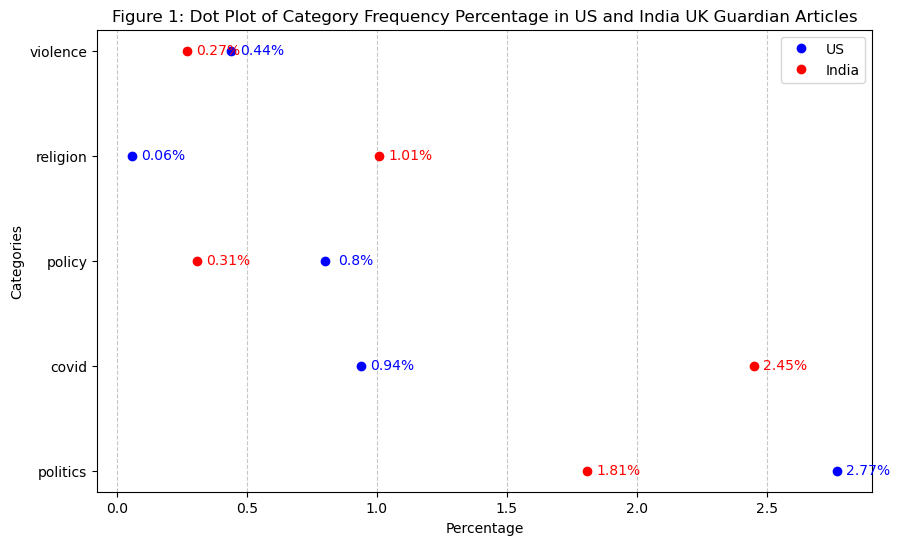

In [21]:
# Preparing data for plotting
us_percentage_plot = {category: value for d in us_percentage_list for category, value in d.items()}
india_percentage_plot = {category: value for d in india_percentage_list for category, value in d.items()}

categories = list(us_percentage_plot.keys()) 

# Creating a dot plot to represent the proportions data for US and India
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the categories on the y-axis
y_positions = range(len(categories), 0, -1)

# Plotting for US with labels
for i, cat in enumerate(categories):
    value = round(us_percentage_plot[cat],2)
    ax.plot(value, y_positions[i], 'o', color='blue', label='US' if i == 0 else "")
    ax.text(value + 0.12, y_positions[i], f"{value}%", ha='center', va='center', color='blue')

# Plotting for India with labels
for i, cat in enumerate(categories):
    value = round(india_percentage_plot[cat],2)
    ax.plot(value, y_positions[i], 'o', color='red', label='India' if i == 0 else "")
    ax.text(value + 0.12, y_positions[i], f"{value}%", ha='center', va='center', color='red')

# Set y-axis to have categories as labels
ax.set_yticks(y_positions)
ax.set_yticklabels(categories)

# Adding gridlines
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Labels and Title
ax.set_xlabel('Percentage')
ax.set_ylabel('Categories')
ax.set_title('Figure 1: Dot Plot of Category Frequency Percentage in US and India UK Guardian Articles')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Written Report

Due to the rise of right-wing activities in the global sphere, our business client would like to understand how different categories regarding right-wing politics in United States and India are being are being represented in the UK Guardian articles after January 1, 2020. 

To find the most common topics in the right-wing query, we have split up the tokens into five categories: policy, violence COVID-19, religion, and politics. Each of those categories has a grouping of tokens that we have selected. From that we were able to gain the percentages for each category per country.

As observed in Figure 1, the United States focuses more on policy, and politics but India has a bigger focus on religion and COVID. The biggest difference was in COVID related tokens, by more than half. This suggests that the COVID was a more central topic in India related news in the UK. Another large difference in topics was in religion, from 0.06% in the US and 1.01% for India.  For the category of violence, the two countries were closely aligned, with 0.27% for India, 0.44% for US.

Further analysis would be recommended as the US had a much larger article count.


### Extra Fun: How would you mark your own assignemnt? 

This is NOT part of the mark, but feel free to complete it. In each of the categories, give yourself points (from 0 to 100) following the marking criteria on top of this notebook. What suggestions for improvement would you give to yourself? Remember 70 and higher means 'I would gladly post this on my LinkedIn'.

🚧 **Example**:

A) Business Question and Answer: 65

B) Using the Data: 55

C) Visualisation: 70

D) Code Quality: 65

E) Code Structure: 60

Things I could improve (very short 2-3 bulletpoints): 
- I still don't fully understand how to use functions, so will practice more. 
- Data structure was quite hard, and I run out of time.


🚧 End of example

### Self-Mark

Marking Criteria:

A) Business Question and Answer: 67

B) Using the Data: 60

C) Visualisation: 67

D) Code Quality: 60

E) Code Structure: 60

Things I could improve:
I feel like we could have perhaps used the data a little more efficently and narrowed our search results further. Also for our visulisation it would be better for the labels to have been easier to read.